# Logistic Regression
When the value of the target variable is categorical in nature, logistic regression is used as a classification algorithm. When the data in issue has binary output, such as when it belongs to one of two classes or is either a 0 or a 1, logistic regression is most commonly used.


# Classification

In contrast to regression, where the goal variable is continuous, classification is a supervised learning issue with a categorical target variable. There are two types of classification: binary (only two potential values of the target variable) and multi-class (more than two categories).

#### In this project, I have used 'Logistic Regression' dataset downloaded from kaggle. 
The dataset can be found at this url:
https://www.kaggle.com/dragonheir/logistic-regression
#### Now, I will be predicting whether user is going to buy a product displayed on a social networking site by clicking the ad on the site

# 1. Importing necessary packages for the Analysis:

In [2]:
import pandas as pd                  # data processing,
import numpy as np                   # linear algebra
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LogisticRegression            #Import Library for Logistic Regression
from sklearn.model_selection import train_test_split           # import important liberaries

# 2. Load the Dataset

In [1]:
from google.colab import files
uploaded = files.upload()

Saving Social_Network_Ads.csv to Social_Network_Ads.csv


In [5]:
# Loading the Data
import io
data = pd.read_csv(io.BytesIO(uploaded['Social_Network_Ads.csv']))

# 3. Data Analysis

In [6]:
data.head(10)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


Here, we see the different variables included in the data set. Let us briefly describe each variable:
					

1.   User Id     : Unique id of each user
2.   Gender   : Sex of each user (i.e. 'Male' or 'Female')
3.  Age : Data of age of each user
4.   Estimated Salary   : Data od salary of each user
5.   Purchased    : Data of user if they buy or not ( Denoted as : 'Purchased: 1' & 'Not Purchased:0' )

# 4. Check for Missing Values

In [8]:
data.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

#### There are no missing values.

 # 5. Data Visualization

Female    204
Male      196
Name: Gender, dtype: int64


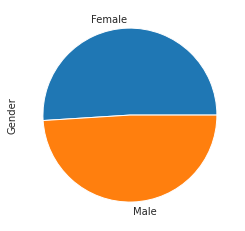

In [42]:
print(data['Gender'].value_counts())
data['Gender'].value_counts().plot.pie()

From above diagram, we can see that there are more Female user than the male user.

0    257
1    143
Name: Purchased, dtype: int64


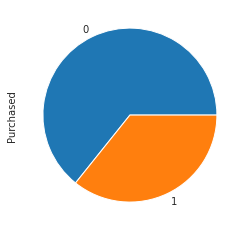

In [45]:
print(data['Purchased'].value_counts())
data['Purchased'].value_counts().plot.pie()

From the above diagram, we can see that there are less purchases 

Gender     Female  Male
Purchased              
0             127   130
1              77    66


Gender,Female,Male
Gender,,
Female,1.000000,1.000000
Male,1.000000,1.000000


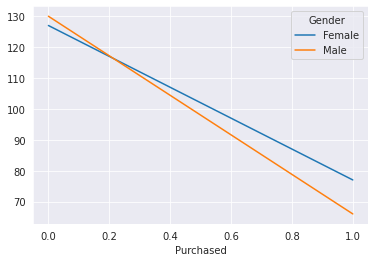

In [50]:
sizeprice = pd.crosstab(index = data['Purchased'], columns = data['Gender'])
print(sizeprice)
sizeprice.plot.line();
corr = sizeprice.corr() 
corr.style.background_gradient(cmap='Blues')

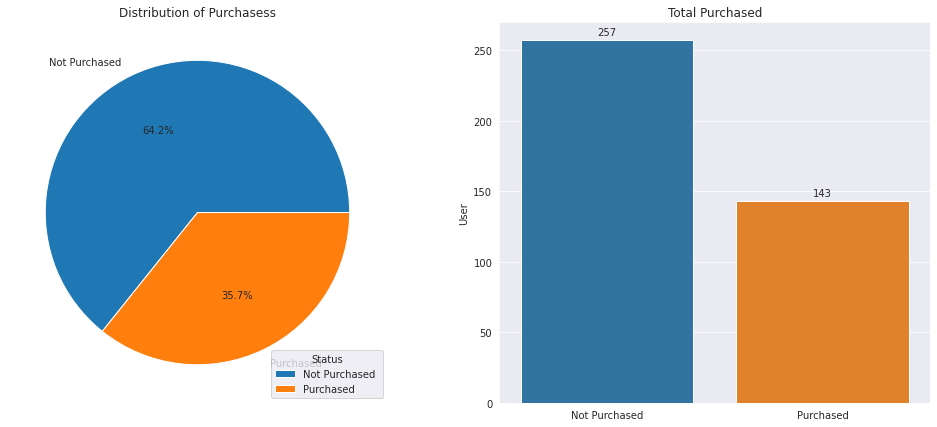

In [64]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(17,7))

ax1.pie(x=data['Purchased'].value_counts(), labels=data['Purchased'].value_counts().index.map({0:'Not Purchased ', 1:'Purchased'}), autopct='%1.1f%%')
ax1.legend(
    title='Status',
    loc = 'lower right')
ax1.set_title('Distribution of Purchasess')

plots = sns.barplot(x=data['Purchased'].value_counts().index.map({0:'Not Purchased', 1:'Purchased'}), y=data['Purchased'].value_counts(), ax=ax2)
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.0f'), (bar.get_x() + bar.get_width() / 2, bar.get_height()), ha='center', va='center', xytext=(0, 8), textcoords='offset points')
ax2.set_ylabel('User')
ax2.set_title('Total Purchased')

plt.show()

We can see that, there are more number of user who do not buy product than the user who buys.




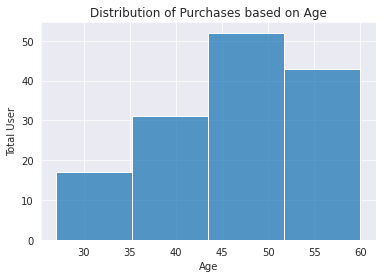

In [62]:
data_Purchased= data[data['Purchased'] == 1].reset_index(drop=True)

sns.histplot(data_Purchased['Age'], bins=4)
plt.xlabel('Age')
plt.ylabel('Total User')
plt.title('Distribution of Purchases based on Age')
plt.show()

The observations from above diagram are:

1.   The users between the age 45 to 50 Purchases more
2.   The users between the age 20 to 35 purchases less



In [9]:
#Checking unique values in the target variable
data['Purchased'].unique()

array([0, 1])

# 6. Convert the categorical variable to numeric

#### The variable 'Purchased' has categorical data. So we will convert into numeric type.

In [10]:
dummies = pd.get_dummies(data['Gender'])
merged = pd.concat([data,dummies], axis='columns')
final_data = merged.drop(['Gender'], axis='columns')
final_data

,User ID,Age,EstimatedSalary,Purchased,Female,Male
0,15624510,19,19000,0,0,1
1,15810944,35,20000,0,0,1
2,15668575,26,43000,0,1,0
3,15603246,27,57000,0,1,0
4,15804002,19,76000,0,0,1
...,...,...,...,...,...,...
395,15691863,46,41000,1,1,0
396,15706071,51,23000,1,0,1
397,15654296,50,20000,1,1,0
398,15755018,36,33000,0,0,1


In [11]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   User ID          400 non-null    int64
 1   Age              400 non-null    int64
 2   EstimatedSalary  400 non-null    int64
 3   Purchased        400 non-null    int64
 4   Female           400 non-null    uint8
 5   Male             400 non-null    uint8
dtypes: int64(4), uint8(2)
memory usage: 13.4 KB


In [12]:
# Size of the Classes
final_data.groupby(['Purchased']).count()

,User ID,Age,EstimatedSalary,Female,Male
Purchased,,,,,
0,257,257,257,257,257
1,143,143,143,143,143


#### From the above, we found that our classes are not of equal size or we have a class imbalance.

# 7. Feature Selection using Correlation Matrix

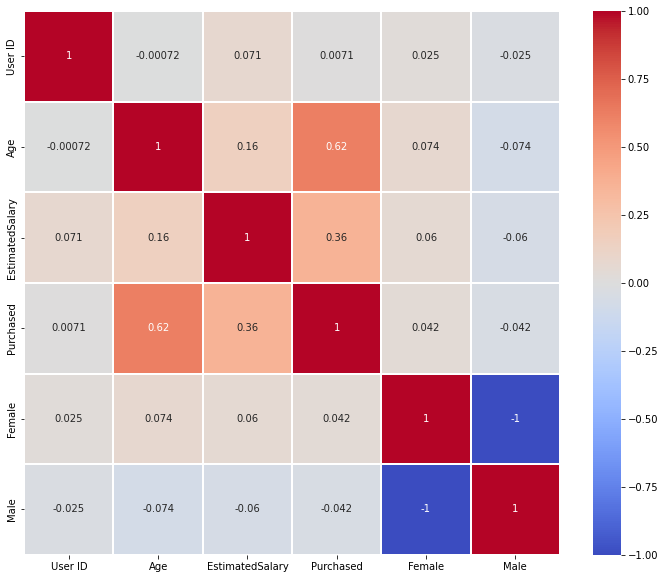

In [13]:
plt.figure(figsize=(12,10))
corr = final_data.corr()
sns.heatmap(corr, annot=True, linewidths=1, cmap='coolwarm')

#### There is no multicollinearity among the predictor variables as the correlation coefficients are very low.
#### The only predictor variable having correlation coefficient>0.5 with target variable is 'Age'. So, the only feature we select is 'Age'.

# 8. Logistic Regression Plot

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


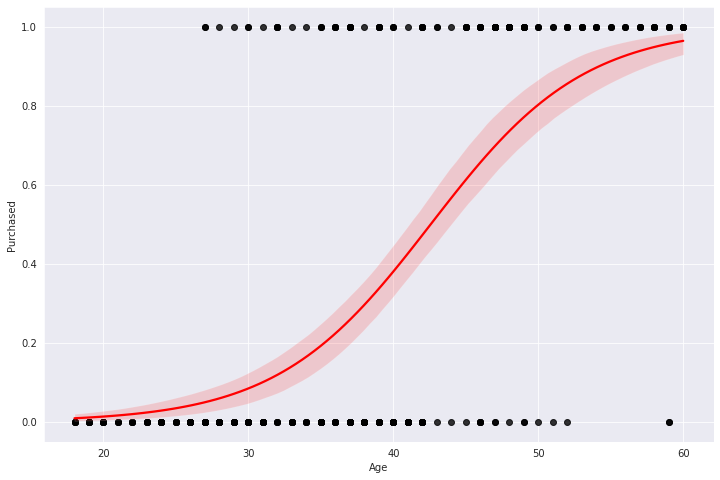

In [14]:
sns.set_style('darkgrid')
p = sns.regplot(x='Age', y='Purchased', data=final_data, logistic=True, scatter_kws={"color": "black"}, line_kws={"color": "red"})
p.figure.set_size_inches(12,8)

# 9. Split the dataset into train and test data

I divided the data into two sets: training and test. The logistic regression model is trained using the training set. The model gains knowledge from the features in the training set. The test set is used to validate the logistic regression model's performance. We forecast the price of the pizza in the test set and compare the predictions to the real values.

> 


We divided the data into two sets, with the training set containing 75% of the data and the test set containing 25% of the data. The train test split module from the scikit-learn package is used.

In [15]:
final_data.shape

(400, 6)

In [16]:
x_train, x_test, y_train, y_test = train_test_split(final_data[['Age']], final_data.Purchased, train_size = 0.75, random_state = 0)

In [17]:
x_train.shape

(300, 1)

In [18]:
x_test.shape

(100, 1)

# 10. Model Initialization

In [22]:
#Initialize the Logistic Regression Classifier
model = LogisticRegression()  

#Train the model using Training Dataset
model.fit(x_train,y_train)

LogisticRegression()

# 11. Predictions

In [23]:
# Prediction using test data
y_predicted = model.predict(x_test)
print('The Predicted values are: ', y_predicted)

The Predicted values are:  [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 1 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1
 0 0 0 0 1 1 1 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0]


# 12. Model Evaluation

## 12.1 Confusion Matrix for a binary classifier

 #### It is a summary of prediction results on a classification problem.
 #### The number of correct and incorrect predictions are summarized with count values and broken down by each class. This is the key to the confusion matrix.


In [25]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_predicted)
cnf_matrix

array([[66,  2],
       [ 8, 24]])

Text(51.0, 0.5, 'Actual label')

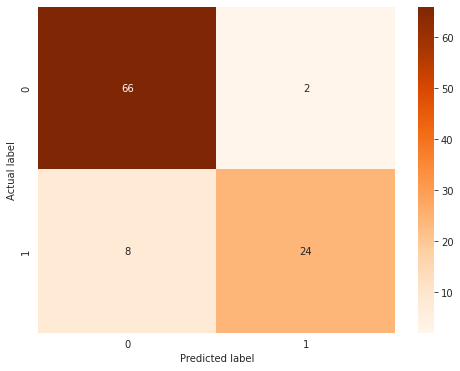

In [26]:
plt.figure(figsize = (8,6))
sns.heatmap(cnf_matrix, annot=True,cmap='Oranges')
plt.xlabel('Predicted label')
plt.ylabel('Actual label')

#### True Negatives(TN) = 66, True Positives(TP) = 23, False Negatives(FN) = 9, False Positives(FP) = 2

## 12.2 Classification Accuracy

> ##### It can be defined as 'number of items in a class labeled correctly out of all items in that class'.
> ##### The formula for Classification accuracy is (TP+TN)/(TP+TN+FP+FN)

In [27]:
#Import Library for Accuracy Score
from sklearn.metrics import accuracy_score

# Calculate Model accuracy by comparing y_test and y_pred
accuracy = metrics.accuracy_score(y_test, y_predicted)
accuracy_percentage = accuracy * 100
print('The percentage of correct predictions for the test data: ', accuracy_percentage)

The percentage of correct predictions for the test data:  90.0


#### When we have a class imbalance, accuracy can become an unreliable metric for measuring our performance. Hence we need other metrics.

## 12.3 Recall Score

> ##### It can be defined as 'Out of all the items that are truly positive, how many were correctly classified as positive'.
> ##### *r simply, how many positive items were 'recalled' from the dataset.
> ##### The formula for Recall Score is TP/(TP+FN).

In [28]:
from sklearn.metrics import recall_score
recall = metrics.recall_score(y_test,y_predicted).round(2)
print('Recall score: ', recall)

Recall score:  0.75


## 12.4 Precision Score

> ##### It can be defined as 'Out of all the items labeled as positive, how many truly belong to the positive class'.
> ##### The formula for Precision Score is TP/(TP+FP)

In [29]:
from sklearn.metrics import precision_score
precision = metrics.precision_score(y_test,y_predicted).round(2)
print('Precision Score: ', precision)

Precision Score:  0.92


## 12.5 F1 Score

> ##### It is defined as the harmonic mean between precision and recall.
> ##### An F1 score reaches its best value at 1 and worst value at 0. A low F1 score is an indication of both poor precision and poor recall.
> ##### The formula for F1 Score is TP / (TP + 0.5 x (FP + FN))

In [30]:
from sklearn.metrics import f1_score
f1_score = metrics.f1_score(y_test,y_predicted).round(2)
print('F1 score: ', f1_score)

F1 score:  0.83


## 12.6 Classification Report

> ##### Finally, using the classification_report, where we can find the values of various metrics of our confusion matrix.

In [31]:
from sklearn.metrics import classification_report
cl_report = metrics.classification_report(y_test,y_predicted)
print('Classification Report: \n', cl_report)

Classification Report: 
               precision    recall  f1-score   support

           0       0.89      0.97      0.93        68
           1       0.92      0.75      0.83        32

    accuracy                           0.90       100
   macro avg       0.91      0.86      0.88       100
weighted avg       0.90      0.90      0.90       100



# 13. AUC ROC Curve

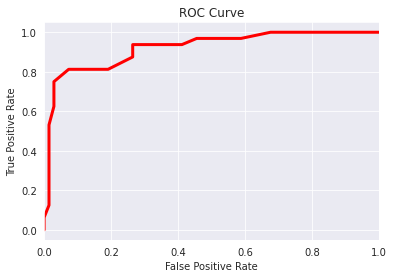

In [36]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
fpr, tpr, thresh = roc_curve(y_test, model.predict_proba(x_test)[:,1], drop_intermediate=False)
plt.xlim([0.0,1.0])
plt.xlim([0.0,1.0])
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(fpr,tpr,color='red',lw=3)
plt.show()

# 14. Conclusion

 #### As we are getting high precision, recall and F1 score, we conclude that the performance of our logistic regression model is good.

#### Also, the logistic regression model has an accuracy of 90 percent. For such a basic model, it's really not awful! Of course, the model's performance might be enhanced further by doing further pre-processing, feature selection, and feature extraction. 